# Drawing FockStateCircuits
This notebooks shows some examples for creating a sketch for the layout of a FockStateCircuit. The circuits in this notebook are not functional circuits. They only serve to demonstrate the ways in which a graphical representation of the circuit can be created.

In [1]:
import sys  
sys.path.append("../src")
import fock_state_circuit as fsc
import collection_of_states as cos
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Different types of nodes
Each node type has a default visual representation.

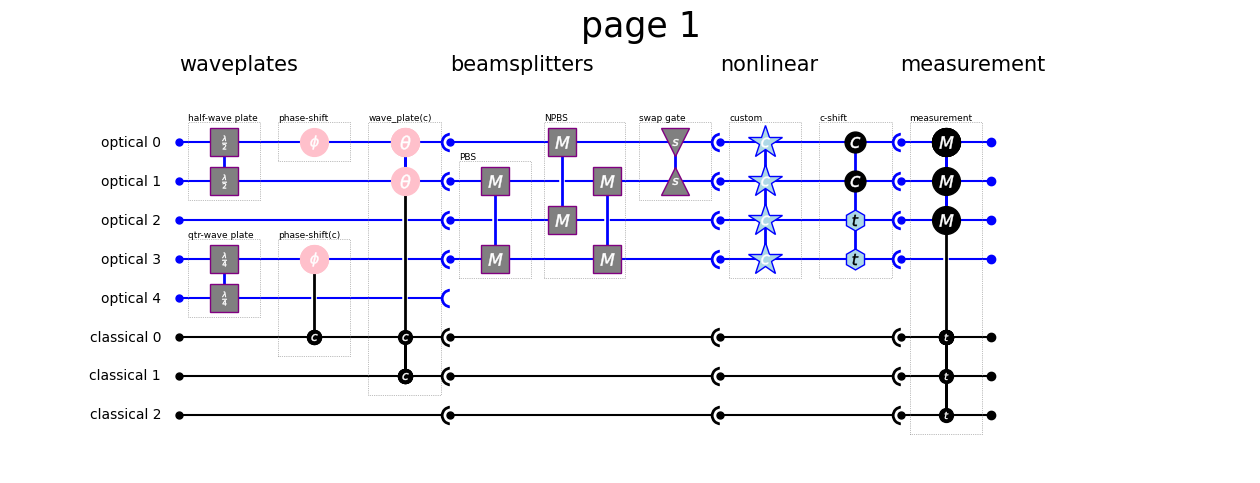

In [2]:
circuit_draw_settings = {
            'compound_circuit_title' : ' '
}

circuit1 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=3,
                                circuit_name='waveplates'
                                )
circuit1.half_wave_plate(channel_horizontal=0,channel_vertical=1, angle=0)
circuit1.quarter_wave_plate(channel_horizontal=3,channel_vertical=4, angle=0)
circuit1.phase_shift_single_channel(channel_for_shift=0,phase_shift=0)
circuit1.phase_shift_single_channel_classical_control(optical_channel_to_shift=3,classical_channel_for_phase_shift=0)
circuit1.wave_plate_classical_control(optical_channel_horizontal=0,optical_channel_vertical=1, classical_channel_for_orientation=0,classical_channel_for_phase_shift=1)


circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='beamsplitters'
                                )
circuit1.bridge(next_fock_state_circuit=circuit2)
circuit2.polarizing_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit2.non_polarizing_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit2.swap(first_channel=0,second_channel=1)



circuit3 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='nonlinear'
                                )
circuit2.bridge(next_fock_state_circuit=circuit3)
matrix = np.identity(len(circuit2.basis()), dtype = np.cdouble)
circuit3.custom_fock_state_node(custom_fock_matrix=matrix)
circuit3.c_shift(control_channels=[0,1], target_channels=[2,3])

circuit4 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='measurement'
                                )
circuit3.bridge(next_fock_state_circuit=circuit4)
circuit4.measure_optical_to_classical(optical_channels_to_be_measured=[0,1,2], classical_channels_to_be_written=[0,1,2])

circuit1.draw(settings_for_drawing_circuit=circuit_draw_settings)

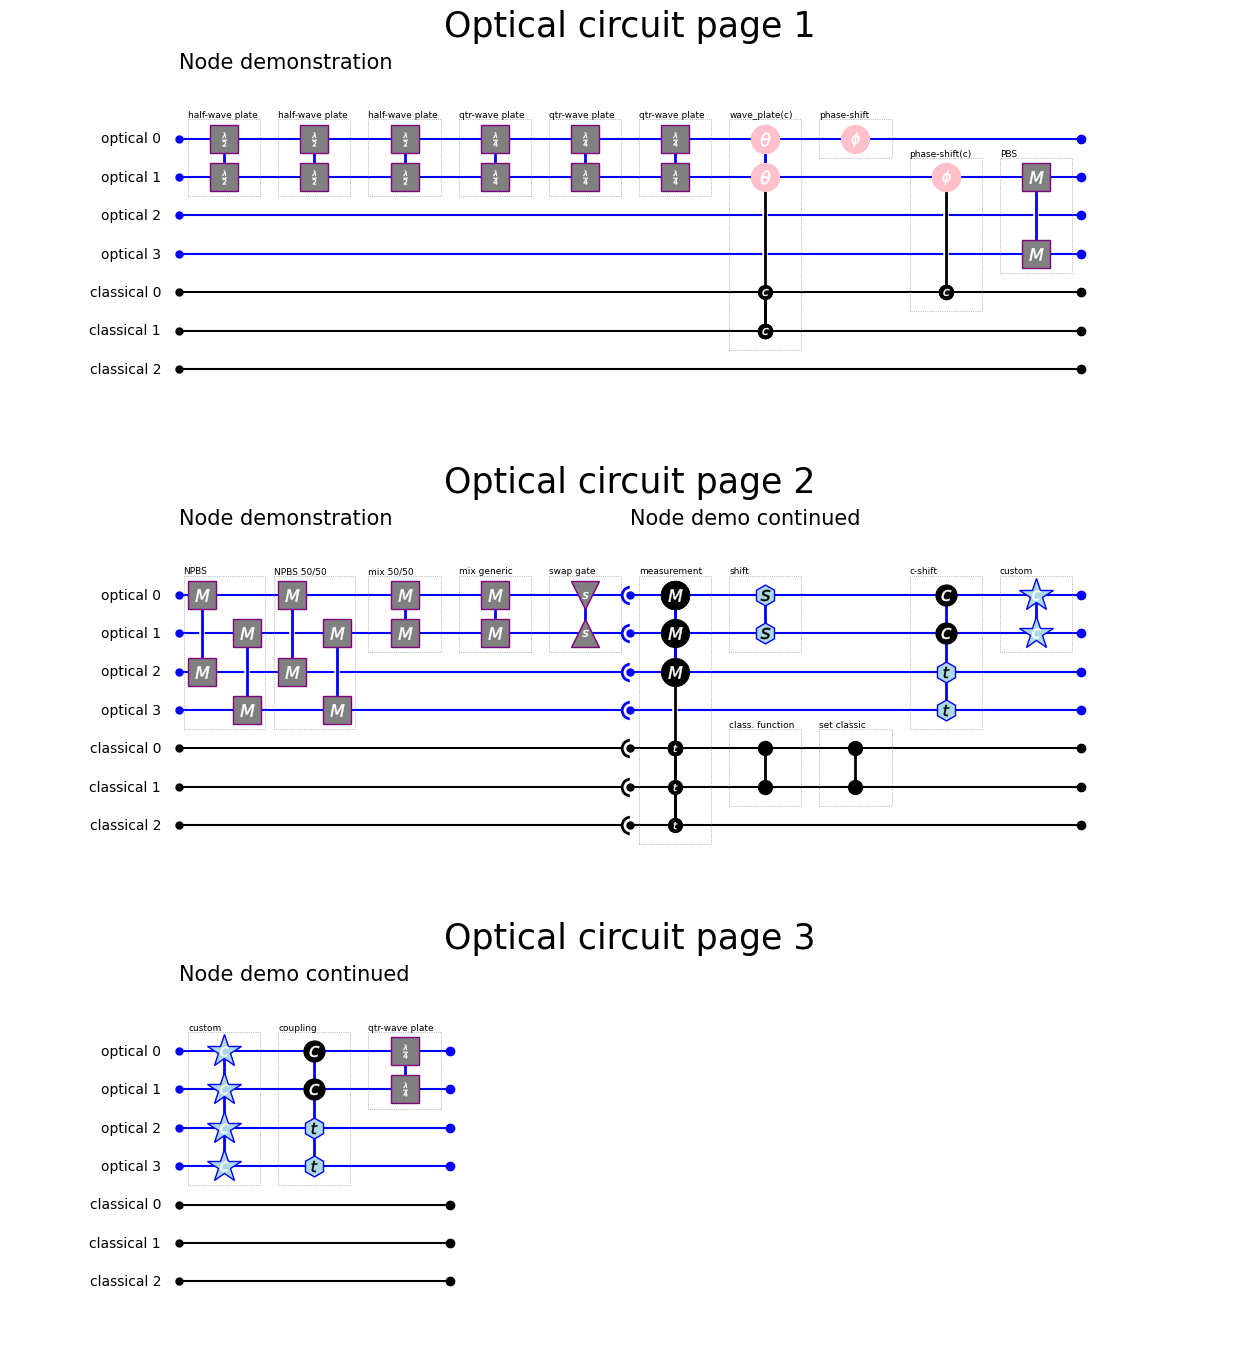

In [3]:
circuit1 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='Node demonstration'
                                )
circuit1.half_wave_plate(channel_horizontal=0,channel_vertical=1, angle=0)
circuit1.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit1.half_wave_plate_225(channel_horizontal=0,channel_vertical=1)
circuit1.quarter_wave_plate(channel_horizontal=0,channel_vertical=1, angle=0)
circuit1.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit1.quarter_wave_plate_225(channel_horizontal=0,channel_vertical=1)
circuit1.wave_plate_classical_control(optical_channel_horizontal=0,optical_channel_vertical=1, classical_channel_for_orientation=0,classical_channel_for_phase_shift=1)
circuit1.phase_shift_single_channel(channel_for_shift=0,phase_shift=0)
circuit1.phase_shift_single_channel_classical_control(optical_channel_to_shift=1,classical_channel_for_phase_shift=0)
circuit1.polarizing_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit1.non_polarizing_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit1.non_polarizing_50_50_beamsplitter(input_channels_a=(0,1), input_channels_b=(2,3))
circuit1.mix_50_50(first_channel=0,second_channel=1)
circuit1.mix_generic_refl_transm(first_channel=0,second_channel=1,reflection=0.5,transmission=0.5)
circuit1.swap(first_channel=0,second_channel=1)
circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3,
                                circuit_name='Node demo continued'
                                )
circuit1.bridge(next_fock_state_circuit=circuit2)
circuit2.measure_optical_to_classical(optical_channels_to_be_measured=[0,1,2], classical_channels_to_be_written=[0,1,2])
def test_function(current_values, new_input_values, affected_channels):
    output_list = current_values[::-1] 
    return output_list
circuit2.classical_channel_function(function=test_function, affected_channels=[0,1])
circuit2.set_classical_channels(list_of_values_for_classical_channels=[1,1], list_of_classical_channel_numbers=[0,1])
matrix = np.identity(2, dtype = np.cdouble)
circuit2.shift(target_channels=[0,1], shift_per_channel=[1,1])
circuit2.c_shift(control_channels=[0,1], target_channels=[2,3])
circuit2.custom_optical_node(matrix_optical=matrix,optical_channels=[0,1])
matrix = np.identity(len(circuit2.basis()), dtype = np.cdouble)
circuit2.custom_fock_state_node(custom_fock_matrix=matrix)
circuit2.channel_coupling(control_channels=[0,1], target_channels=[2,3], coupling_strength=1)
circuit2.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1)

circuit1.draw()

## Combined nodes
Nodes can be combined together. This does not affect the operation but can make the layout of the circuit visually more clear. As example, a beamsplitter is one component that can affect 4 channels. Grouping together the nodes can emphasize that it is one single optical component. If consecutive nodes have the setting `'combined_gate': True`, they will be represented as a combined node in the circuit drawing.

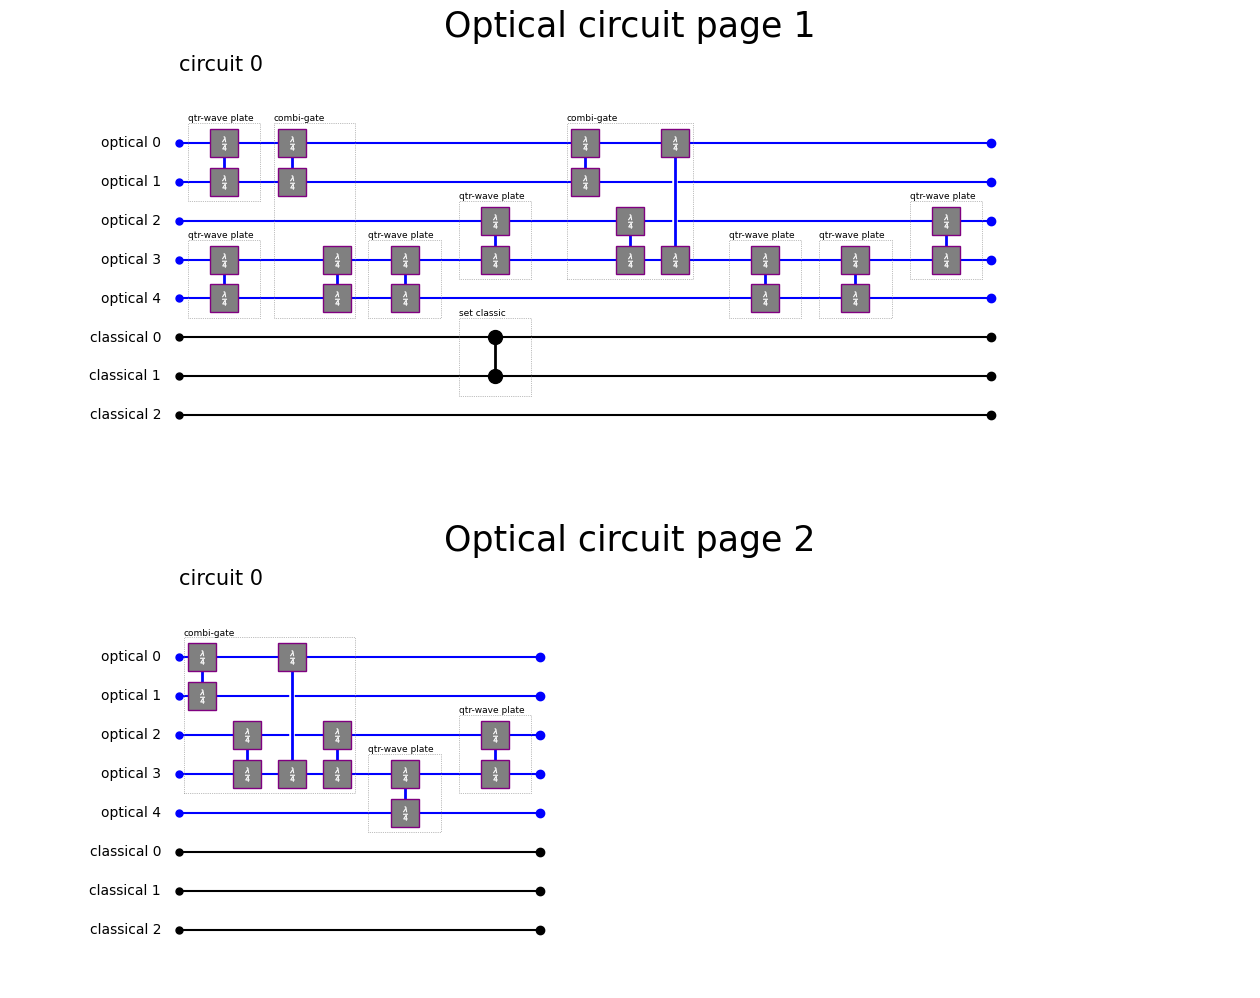

In [4]:

circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=3
                                )
circuit2.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit2.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit2.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1, node_info = {'label': 'combi-gate', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4, node_info = {'label': 'ignore', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit2.quarter_wave_plate_45(channel_horizontal=2,channel_vertical=3)
circuit2.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1, node_info = {'label': 'combi-gate', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=2,channel_vertical=3, node_info = {'label': 'ignore', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=3, node_info = {'label': 'ignore', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit2.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit2.quarter_wave_plate_45(channel_horizontal=2,channel_vertical=3)
circuit2.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1, node_info = {'label': 'combi-gate', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=2,channel_vertical=3, node_info = {'label': 'ignore', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=3, node_info = {'label': 'ignore', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=2,channel_vertical=3, node_info = {'label': 'ignore', 'combined_gate': True})
circuit2.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit2.quarter_wave_plate_45(channel_horizontal=2,channel_vertical=3)
circuit2.set_classical_channels(list_of_values_for_classical_channels=[1,1], list_of_classical_channel_numbers=[0,1])
circuit2.draw()

# Bridges between circuits
We can also link circuits together by using 'bridge nodes'. The circuits are separated by a connector symbol. Each circuit can be labelled with a `circuit_name` for identification.

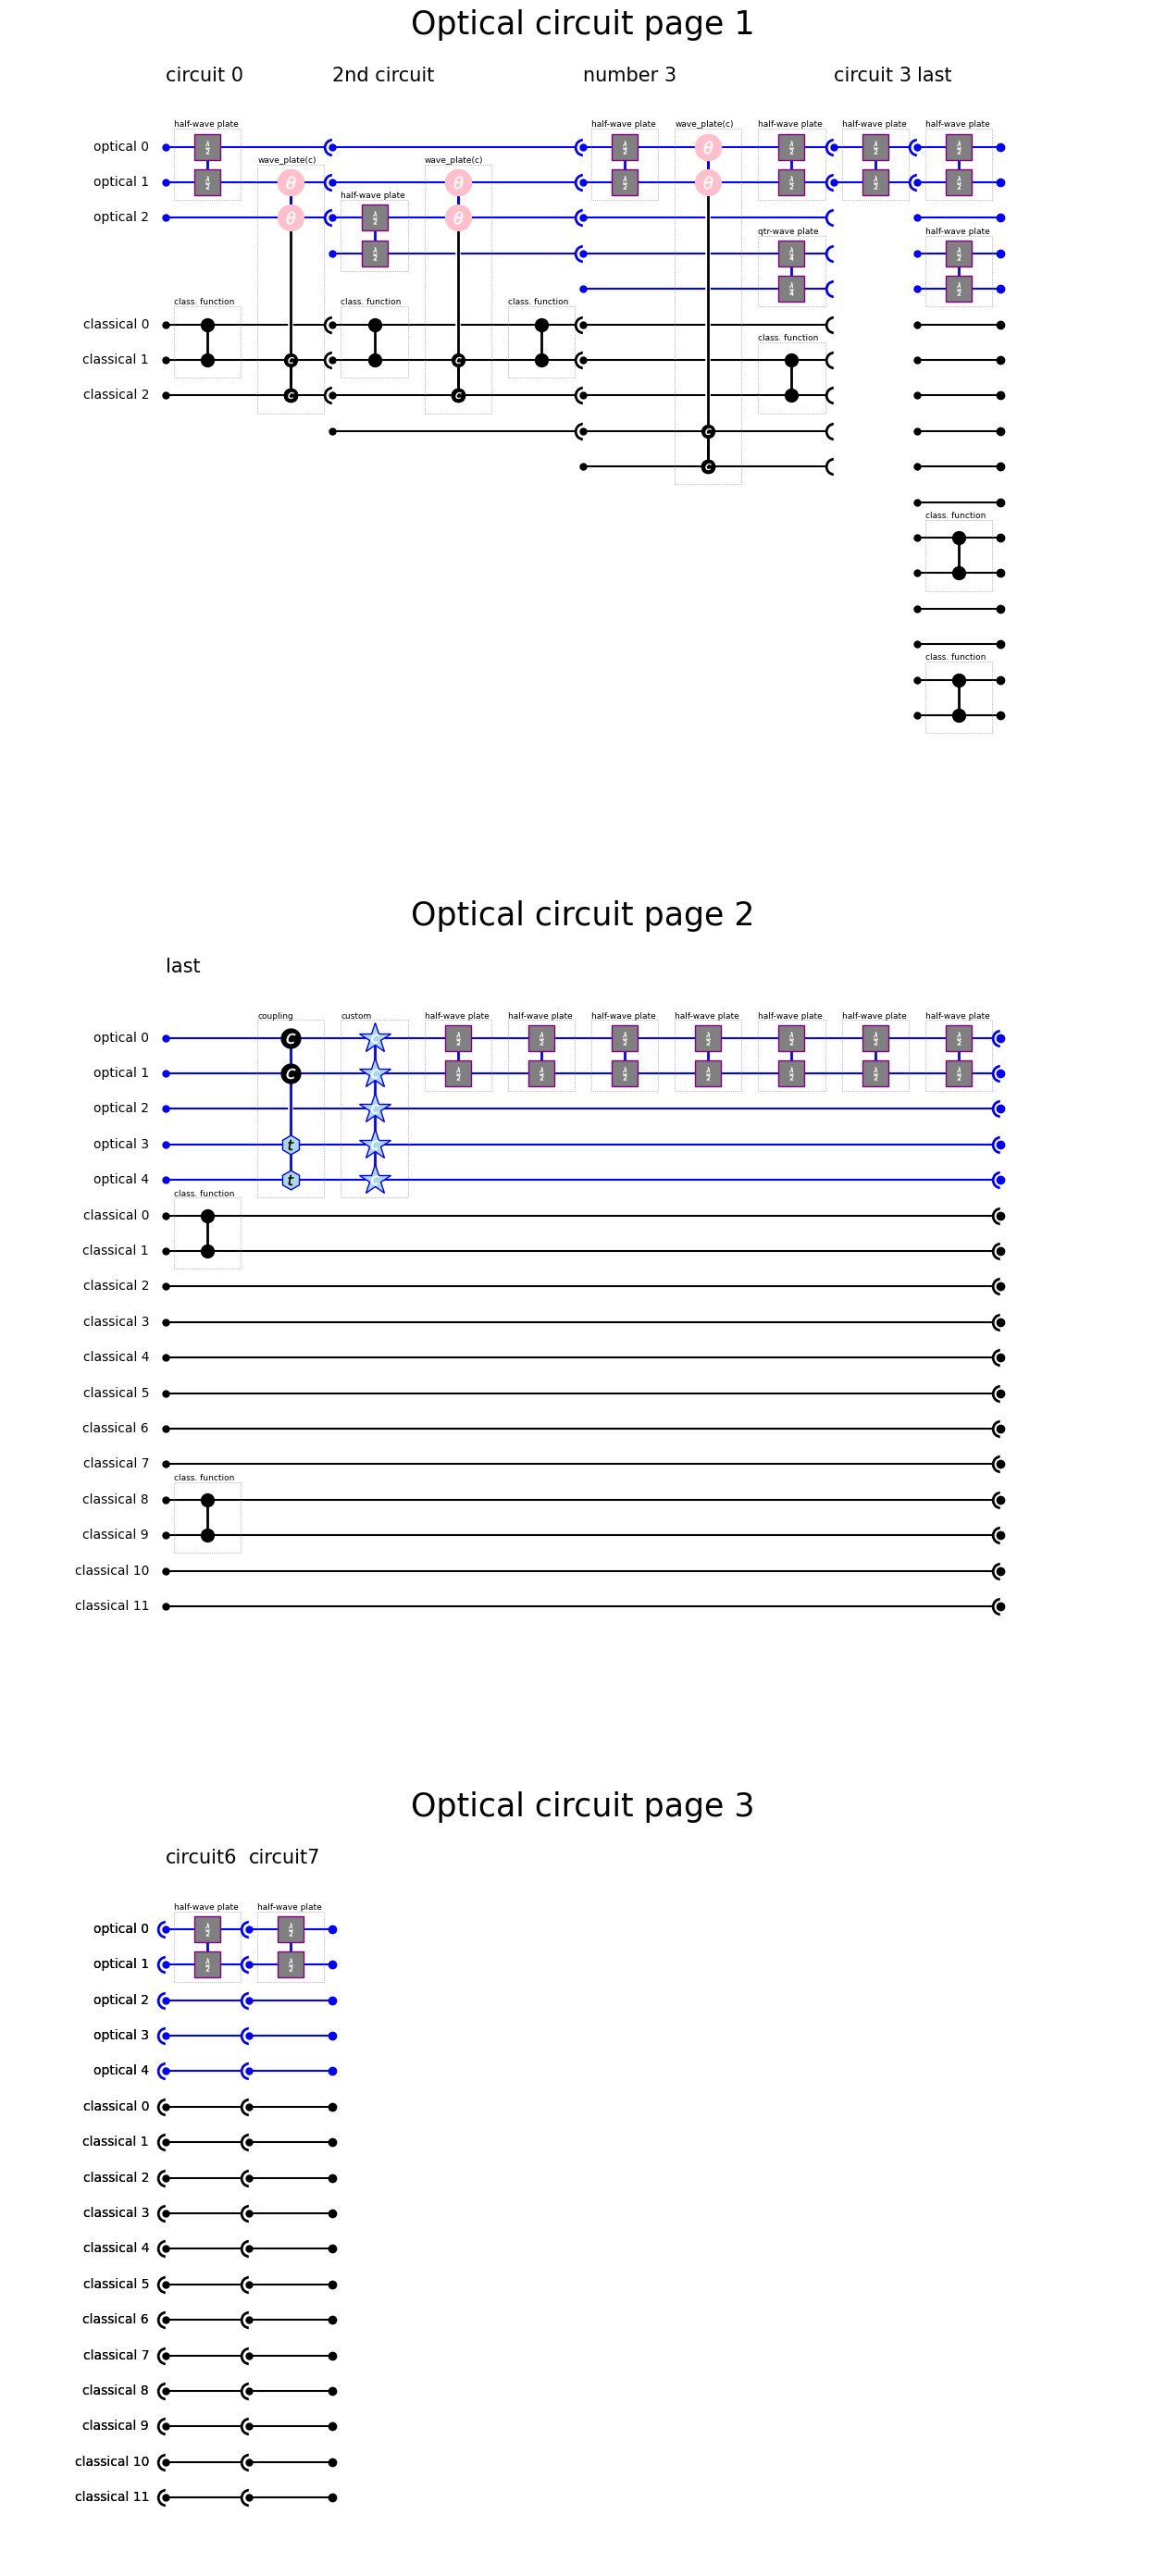

In [5]:
circuit1 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 3, 
                                no_of_classical_channels=3,
                                )
circuit1.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
def function(current_values, new_input_values, affected_channels):
    for index, channel in enumerate(affected_channels):
        current_values[channel] = new_input_values[index]
    return current_values
circuit1.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )
circuit1.wave_plate_classical_control(optical_channel_horizontal=1,optical_channel_vertical=2,classical_channel_for_orientation=1,classical_channel_for_phase_shift=2)
circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=4,
                                circuit_name="2nd circuit"
                                )
circuit1.bridge(next_fock_state_circuit=circuit2)
circuit2.half_wave_plate_45(channel_horizontal=2,channel_vertical=3)
circuit2.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )
circuit2.wave_plate_classical_control(optical_channel_horizontal=1,optical_channel_vertical=2,classical_channel_for_orientation=1,classical_channel_for_phase_shift=2)
def function(current_values, new_input_values, affected_channels):
    for index, channel in enumerate(affected_channels):
        current_values[channel] = new_input_values[index]
    return current_values
circuit2.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )
circuit3 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=5,
                                circuit_name= 'number 3')
circuit2.bridge(next_fock_state_circuit=circuit3)
circuit3.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit3.wave_plate_classical_control(optical_channel_horizontal=0,optical_channel_vertical=1,classical_channel_for_orientation=3,classical_channel_for_phase_shift=4)
circuit3.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit3.classical_channel_function(function = function, affected_channels=[1,2], new_input_values=[10,10] )
circuit3.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit4 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels=0)
circuit3.bridge(next_fock_state_circuit=circuit4)
circuit4.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=12,
                                circuit_name= 'last')
circuit4.bridge(next_fock_state_circuit=circuit5)
circuit5.classical_channel_function(function = function, affected_channels=[10,11], new_input_values=[10,10] )
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit5.classical_channel_function(function = function, affected_channels=[8,9], new_input_values=[10,10] )
circuit5.classical_channel_function(function = function, affected_channels=[6,7], new_input_values=[10,10] )
circuit5.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )
circuit5.basis()
circuit5.channel_coupling(control_channels=[0,1], target_channels=[3,4])
custom_Fock_state_matrix = np.identity(len(circuit5.basis()),dtype = np.cdouble)
circuit5.custom_fock_state_node(custom_fock_matrix=custom_Fock_state_matrix)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit6 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=12,
                                circuit_name= 'circuit6')
circuit5.bridge(next_fock_state_circuit=circuit6)
circuit6.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit7 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=12,
                                circuit_name= 'circuit7')
circuit6.bridge(next_fock_state_circuit=circuit7)
circuit7.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit1.draw()

# Compound circuits

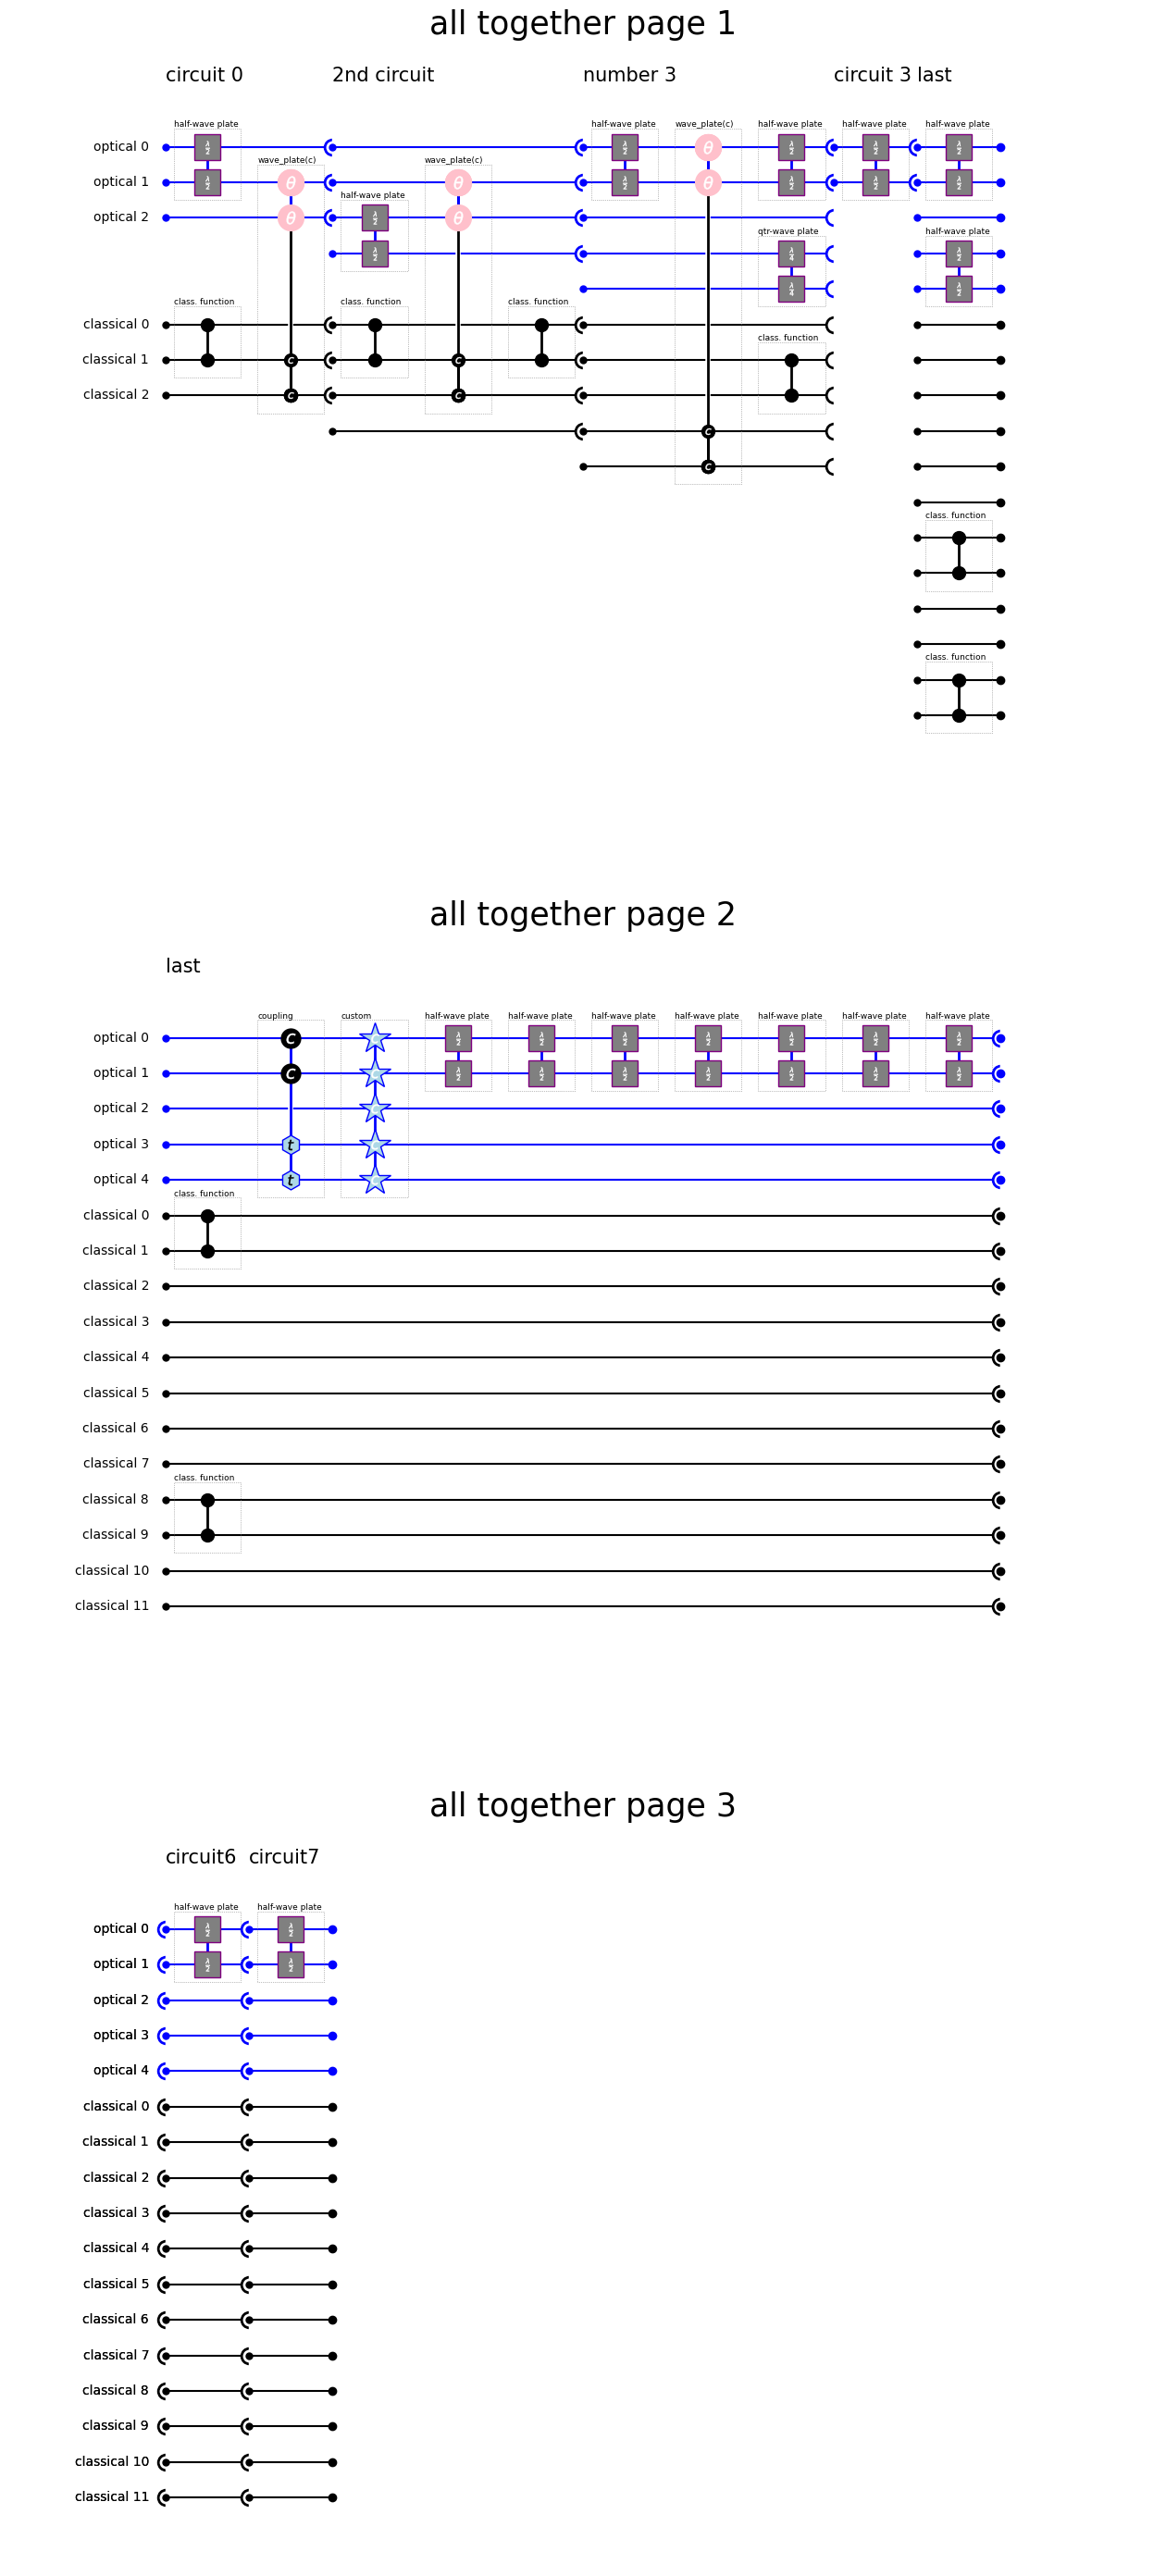

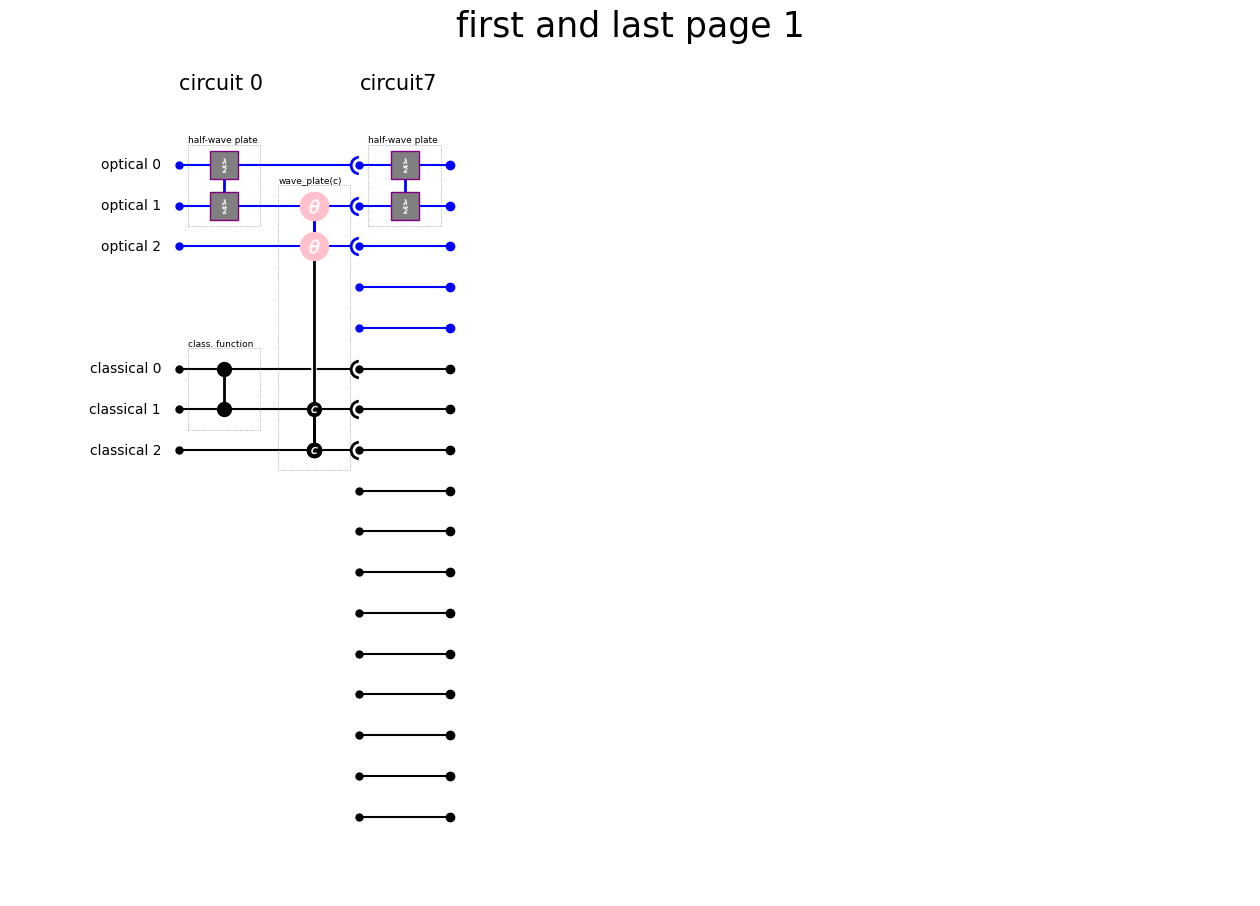

In [6]:
# create the first circuit
circuit1 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 3, 
                                no_of_classical_channels=3
                                )
circuit1.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
def function(current_values, new_input_values, affected_channels):
    for index, channel in enumerate(affected_channels):
        current_values[channel] = new_input_values[index]
    return current_values
circuit1.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )
circuit1.wave_plate_classical_control(optical_channel_horizontal=1,optical_channel_vertical=2,classical_channel_for_orientation=1,classical_channel_for_phase_shift=2)

# create the second circuit
circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=4,
                                circuit_name="2nd circuit"
                                )

circuit2.half_wave_plate_45(channel_horizontal=2,channel_vertical=3)
circuit2.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )
circuit2.wave_plate_classical_control(optical_channel_horizontal=1,optical_channel_vertical=2,classical_channel_for_orientation=1,classical_channel_for_phase_shift=2)
def function(current_values, new_input_values, affected_channels):
    for index, channel in enumerate(affected_channels):
        current_values[channel] = new_input_values[index]
    return current_values
circuit2.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )

# create the third circuit
circuit3 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=5,
                                circuit_name= 'number 3')
circuit3.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit3.wave_plate_classical_control(optical_channel_horizontal=0,optical_channel_vertical=1,classical_channel_for_orientation=3,classical_channel_for_phase_shift=4)
circuit3.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit3.classical_channel_function(function = function, affected_channels=[1,2], new_input_values=[10,10] )
circuit3.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)

# create the 4th circuit
circuit4 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 2, 
                                no_of_classical_channels=0)
circuit4.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)

# create the 5th circuit
circuit5 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=12,
                                circuit_name= 'last')
circuit5.classical_channel_function(function = function, affected_channels=[10,11], new_input_values=[10,10] )
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=3,channel_vertical=4)
circuit5.classical_channel_function(function = function, affected_channels=[8,9], new_input_values=[10,10] )
circuit5.classical_channel_function(function = function, affected_channels=[6,7], new_input_values=[10,10] )
circuit5.classical_channel_function(function = function, affected_channels=[0,1], new_input_values=[10,10] )
circuit5.basis()
circuit5.channel_coupling(control_channels=[0,1], target_channels=[3,4])
custom_Fock_state_matrix = np.identity(len(circuit5.basis()),dtype = np.cdouble)
circuit5.custom_fock_state_node(custom_fock_matrix=custom_Fock_state_matrix)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit5.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)

# create the 6th circuit
circuit6 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=12,
                                circuit_name= 'circuit6')
circuit6.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)

# create the 7th circuit
circuit7 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=12,
                                circuit_name= 'circuit7')
circuit7.half_wave_plate_45(channel_horizontal=0,channel_vertical=1)

# create the compound circuit combining all circuits together
circuit_list = [circuit1,circuit2,circuit3,circuit4,circuit5,circuit6,circuit7]
compound_circuit = fsc.CompoundFockStateCircuit(circuit_list, compound_circuit_name='all together')
compound_circuit.draw()

# create another compound circuit only connecting the first and last circuit
circuit_list = [circuit1,circuit7]
compound_circuit = fsc.CompoundFockStateCircuit(circuit_list, compound_circuit_name='first and last')
compound_circuit.draw()

# Custom settings for node
We can overwrite the default settings for displaying a node by passing a dictionary for `node_info` when the node is created. We can chose to overwrite all settings, or just a selected setting.

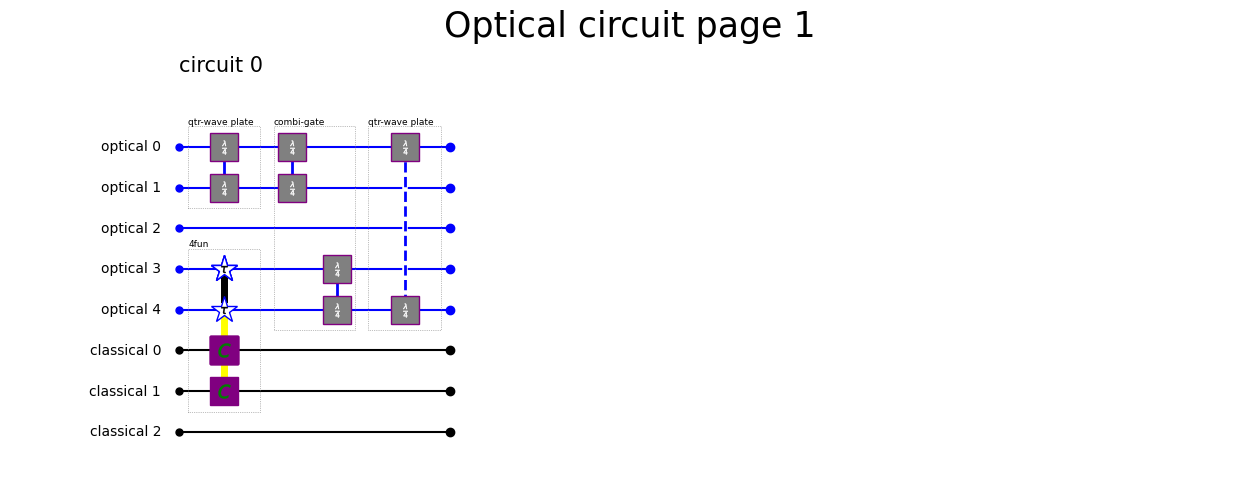

In [7]:
circuit8 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 5, 
                                no_of_classical_channels=3
                                )
# we can modify all settingd for displaying a node
custom_node_info = {
            'label' : '4fun',
            'connection_linestyle' : 'solid',
            'connection_linewidth': 5,
            'connection_linecolor_optical': 'black',
            'connection_linecolor_classical': 'yellow',
            'channels' : [3,4],
            'channels_classical': [0,1],
            'markers' : ['*'],
            'markercolor' : ['blue'],
            'markerfacecolor' : ['white'],
            'marker_text' : [r"$\tau$"],
            'marker_text_fontsize': [5],
            'marker_text_color': ['black'],
            'markersize' : [20],
            'markeredgewidth' : 1,
            'fillstyle' : ['full'],
            'classical_marker_color' : ['purple'],
            'classical_marker' : ['s'],
            'classical_marker_size' : ['20'],
            'classical_marker_text' : [r"$c$"],
            'classical_marker_text_color' : ['green'],
            'classical_marker_text_fontsize': [10],
            'combined_gate': 'single'
        }
circuit8.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit8.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4, node_info = custom_node_info)
circuit8.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1, node_info = {'label': 'combi-gate', 'combined_gate': True})
circuit8.quarter_wave_plate_45(channel_horizontal=3,channel_vertical=4, node_info = {'label': 'ignore', 'combined_gate': True})

# we can also chose to modify only one aspect
custom_node_info = {
            'connection_linestyle' : 'dashed',
        }
circuit8.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=4, node_info = custom_node_info)
circuit8.draw()

# Custom circuit settings for the circuit
Similar to ovewriting the dedault settings for nodes we can also overwrite default settings for the circuit as a whole

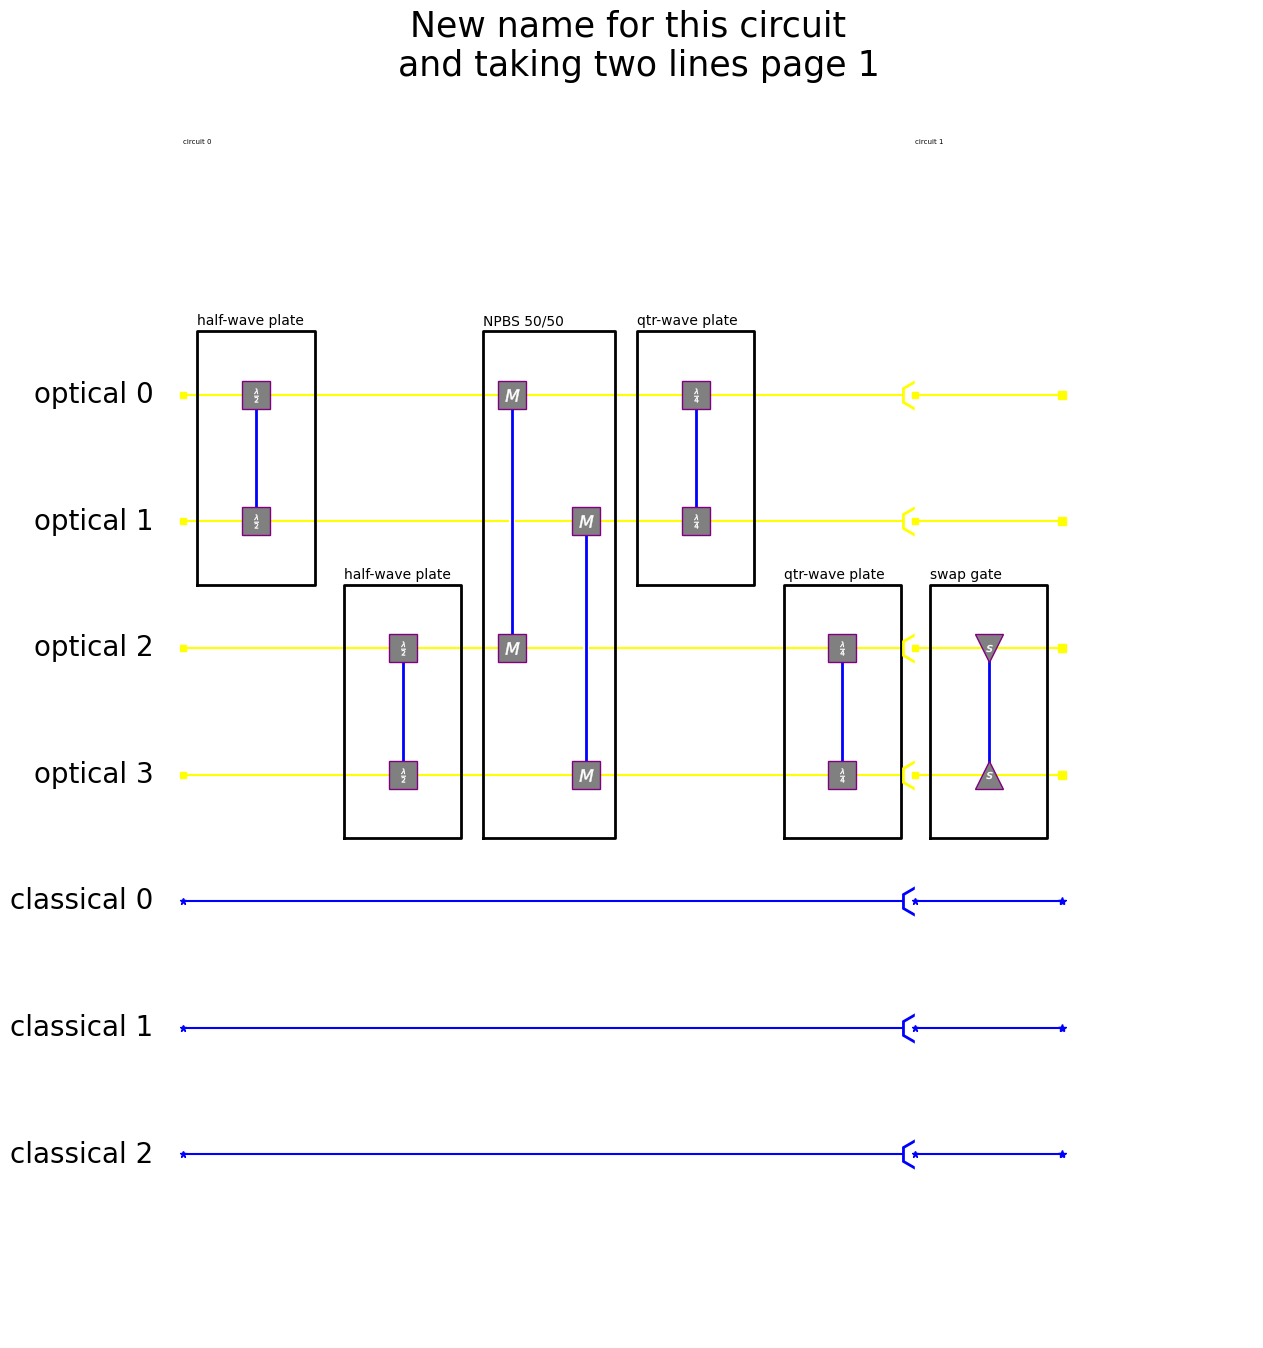

In [8]:
circuit_draw_settings = {
            'figure_width_in_inches' : 16,
            'channel_line_length_as_fraction_of_figure_width' : 0.8,
            'number_of_nodes_on_a_line': 6,
            'spacing_between_lines_in_relation_to_spacing_between_nodes' : 2,
            'compound_circuit_title' : 'New name for this circuit \n and taking two lines',
            'channel_label_string_max_length': 15,
            'node_label_string_max_length': 15,
            'compound_plot_title_font_size' : 25,
            'circuit_name_font_size': 5,
            'channel_label_font_size': 20,
            'node_label_font_size' : 10,
            'classical_channel_line_color' : 'blue',
            'classical_channel_line_marker' : '*',
            'classical_channel_line_marker_size' : 5,
            'optical_channel_line_color' :'yellow',
            'optical_channel_line_marker': 's',
            'optical_channel_line_marker_size' : 5,
            'bridge_marker' : 'h',
            'bridge_marker_size' : 20,
            'bridge_markeredgewidth' : 2,
            'box_around_node_linestyle' : 'solid',
            'box_around_node_linewidth': 2,
            'box_around_node_color' : 'black'
        }
circuit1 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3
                                )
circuit1.half_wave_plate(channel_horizontal=0,channel_vertical=1, angle=0)
circuit1.half_wave_plate_45(channel_horizontal=2,channel_vertical=3)
circuit1.non_polarizing_50_50_beamsplitter(input_channels_a=(0,1),input_channels_b=(2,3))
circuit1.quarter_wave_plate_45(channel_horizontal=0,channel_vertical=1)
circuit1.quarter_wave_plate_225(channel_horizontal=2,channel_vertical=3)

circuit2 = fsc.FockStateCircuit(length_of_fock_state = 2, 
                                no_of_optical_channels = 4, 
                                no_of_classical_channels=3
                                )
circuit1.bridge(next_fock_state_circuit=circuit2)
circuit2.swap(first_channel=2, second_channel=3)

circuit1.draw(settings_for_drawing_circuit=circuit_draw_settings)

In [9]:
fsc.about()


FockStateCircuit: Quantum Optics with Fock States for Python
Copyright (c) 2023 and later.
Rob Hendriks

FockStateCircuit:   0.0.9
CollectionOfStates: 0.0.9
Numpy Version:      1.26.1
Matplotlib version: 3.8.0
